# Multi-Class Text Classification

* This text classification project is based on the [BBC news articles on kaggle](https://www.kaggle.com/yufengdev/bbc-fulltext-and-category). 
* The dataset consists of news articles of various categories like tech, business, sports etc.
* We will try to analyse the data set first and then use some of the traditional machine learning algorithms to draw predictions.

# 1. Importing Data

In [14]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv(r"BBC News Train.csv")
df.head()
df_test = pd.read_csv(r"BBC News Test.csv")
df_test.head()
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [16]:
df.shape

(1490, 3)

# 2. EDA

When it comes to text data, EDA is ~~a little~~ very different than what we do for traditional datasets. I have accumulated some great methods from numerous sources and articles online which I will use to analyse our dataset here.

## 2.1 Factorization
First, let's factorize the "category" column - 

In [17]:
df.info()
df['category_id'] = df.Category.factorize()[0]
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


,ArticleId,Text,Category,category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [18]:
df.shape

(1490, 4)

We will now take a look at how the Product categories are mapped and then also create couple dictionaries from the same for future reference (mapping categories to factors and vice-versa) - 

In [19]:
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values(by = 'category_id').reset_index(drop = 1)
category_id_df

,Category,category_id
0,business,0
1,tech,1
2,politics,2
3,sport,3
4,entertainment,4


In [20]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

Now that we have seen how our categories have been mapped to their respective numeric counterparts, let's take a look at their distribution.

## 2.2 Distribution of Categories

In [23]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

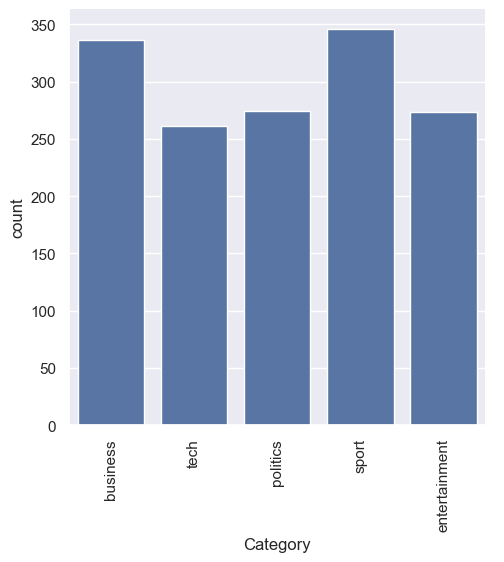

In [24]:
sns.set(font_scale=1)
g = sns.catplot(
            data = df,
            x = "Category", 
            kind = "count"
            )
g.set_xticklabels(rotation = 90)

> As can be seen in the distribution, the dependent variable is quite balanced (as balanced as a dataset can be irl). 

## 2.3 Word Cloud

Now, let's build a category-wise word cloud to demonstrate which are the most frequent terms for each of the categories. This will give us a brief idea if there are any frequent words that separate our data up to some extent.

In [25]:
df.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [26]:
#print(df.Text[0])
tech = ' '.join(list(df.Text[df.Category == 'tech']))
business = ' '.join(list(df.Text[df.Category == 'business']))
sport = ' '.join(list(df.Text[df.Category == 'sport']))
entertainment = ' '.join(list(df.Text[df.Category == 'entertainment']))
politics = ' '.join(list(df.Text[df.Category == 'politics']))

### 2.3.1 Stopwords

* When it comes to NLP, getting rid of stopwords is one of the most important steps. It ensures we get rid of the most frequent but usually useless words, e.g. "the", "a", "an", etc. to eliminate any bias they might cause.
* We have many methods to eliminate stop words - many NLP libraries like sklearn have their own stop words but it is usually considered a good idea to use stop words from the NLTK library. We shall do the same.

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mansi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

### 2.3.2 Word Cloud by Category

Now that we have our stop words in a list, we can build our word clouds.

In [29]:
from wordcloud import WordCloud

def wordcloud(text, title):
    wordcloud = WordCloud(
        width = 1600,
        height = 1000,
        background_color = "black",
        stopwords = stop_words,
        min_font_size = 10
    ).generate(text)

    plt.figure(figsize = (16, 10), facecolor = None) 
    plt.imshow(wordcloud)
    plt.title("Word Cloud for " + title + " Articles\n", fontsize = 20)
    plt.axis("off")
    plt.show()

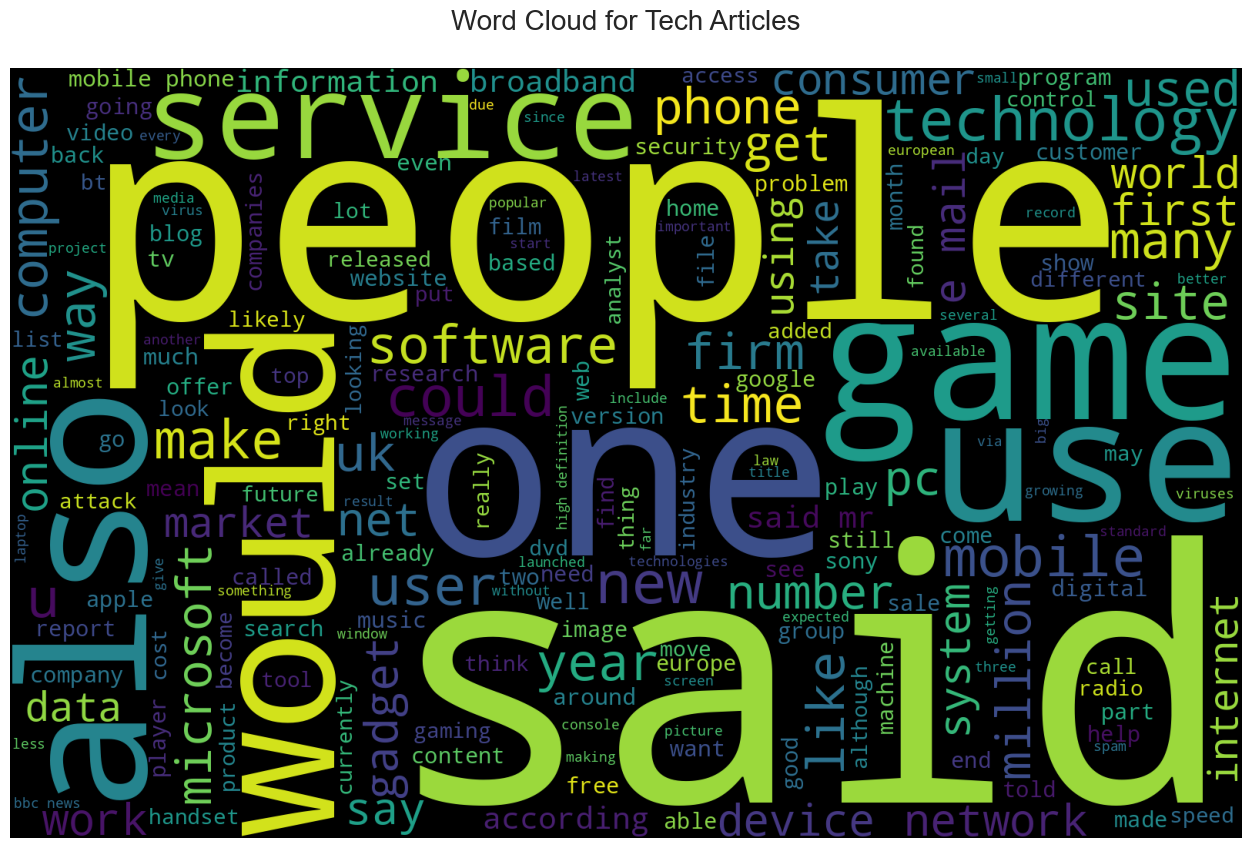

In [ ]:
wordcloud(tech, "Tech")

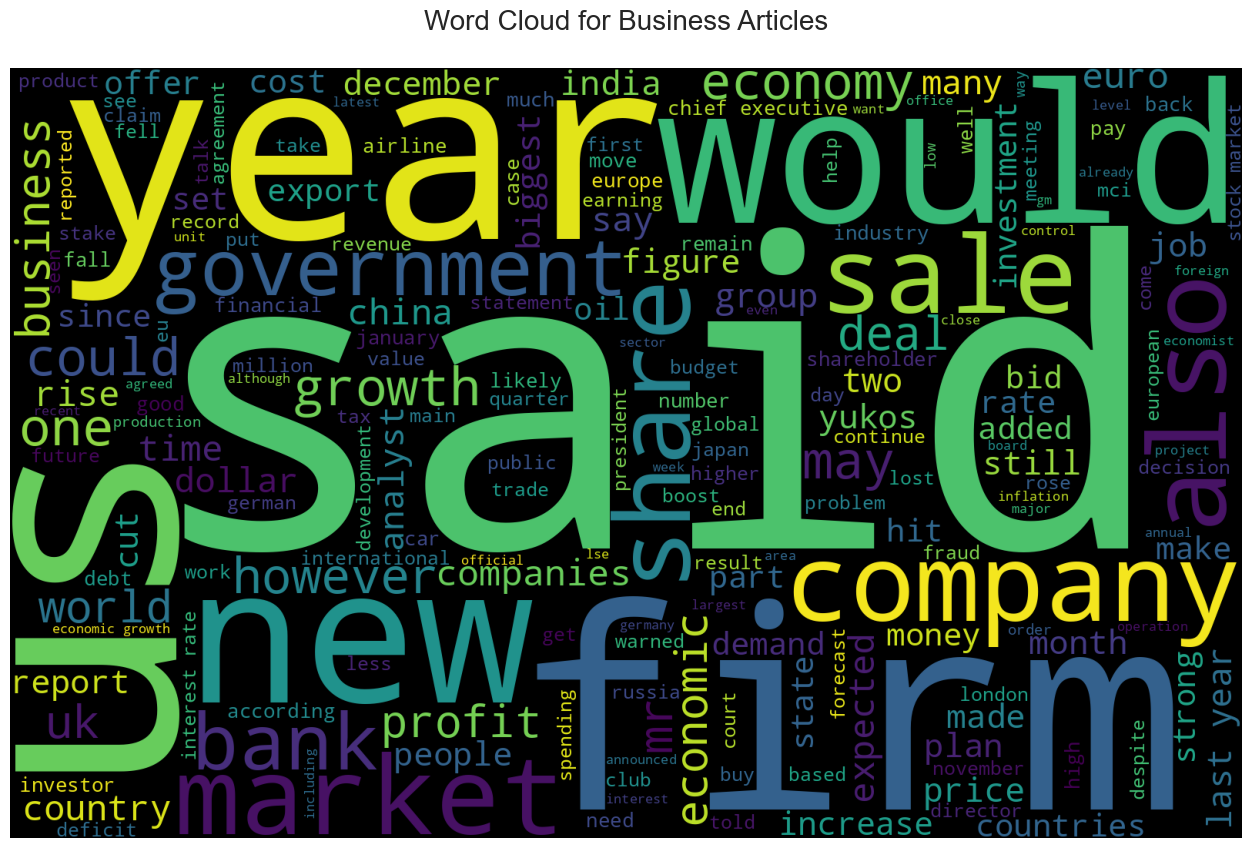

In [31]:
wordcloud(business, "Business")

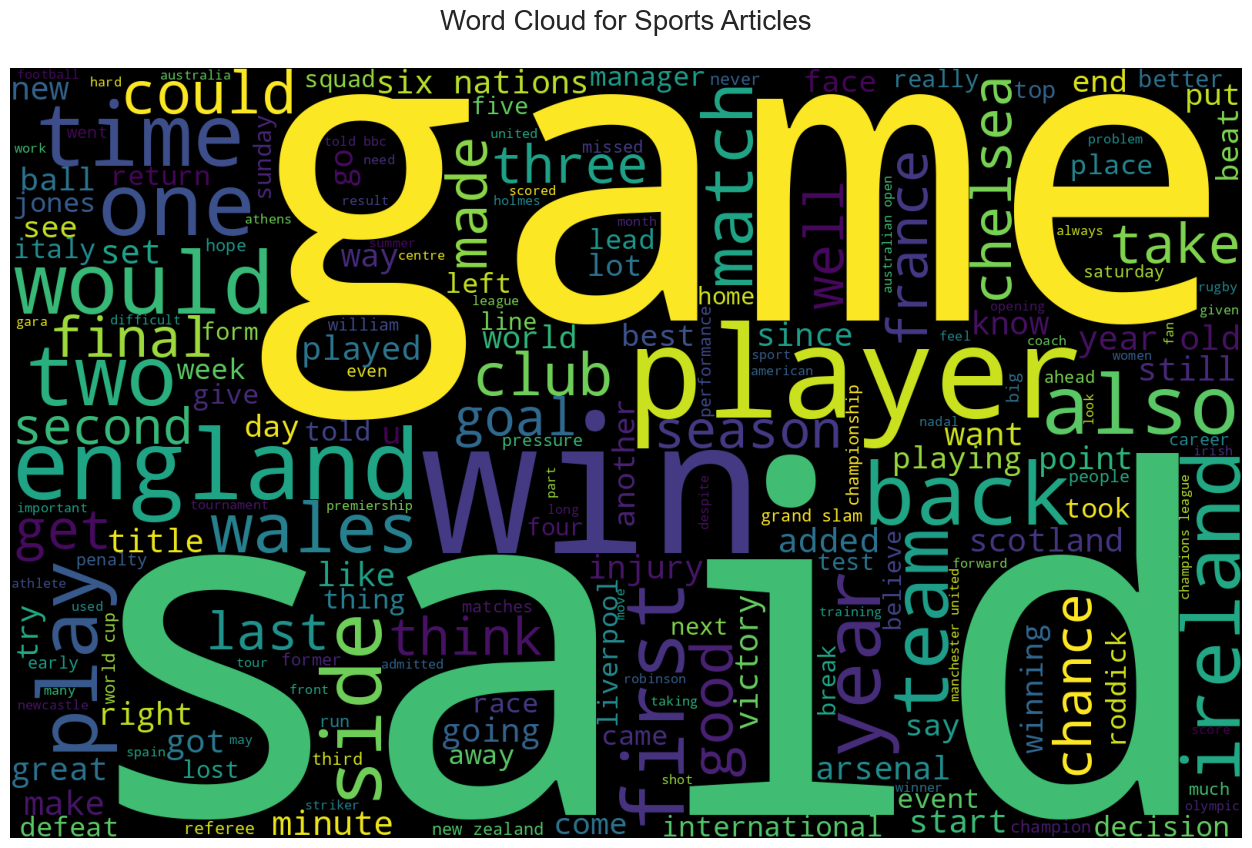

In [32]:
wordcloud(sport, "Sports")

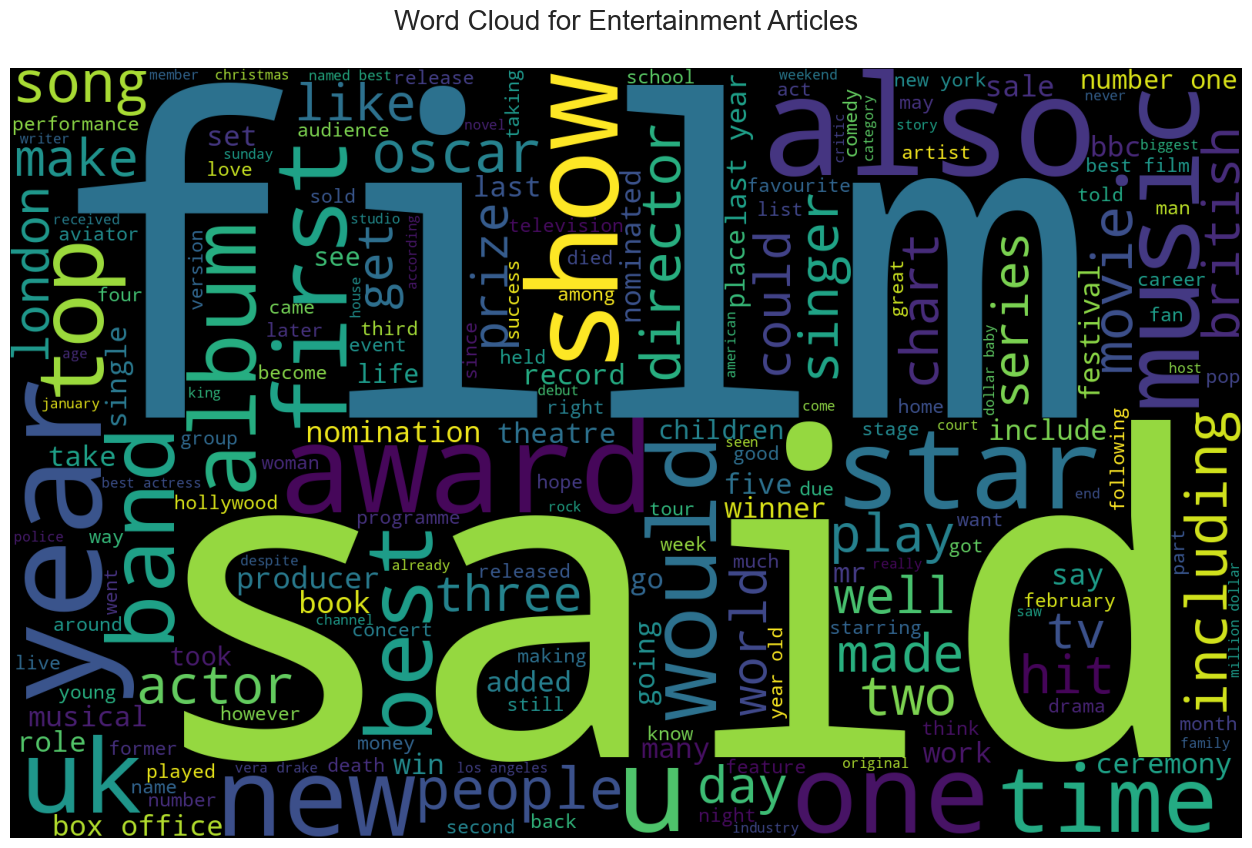

In [33]:
wordcloud(entertainment, "Entertainment")

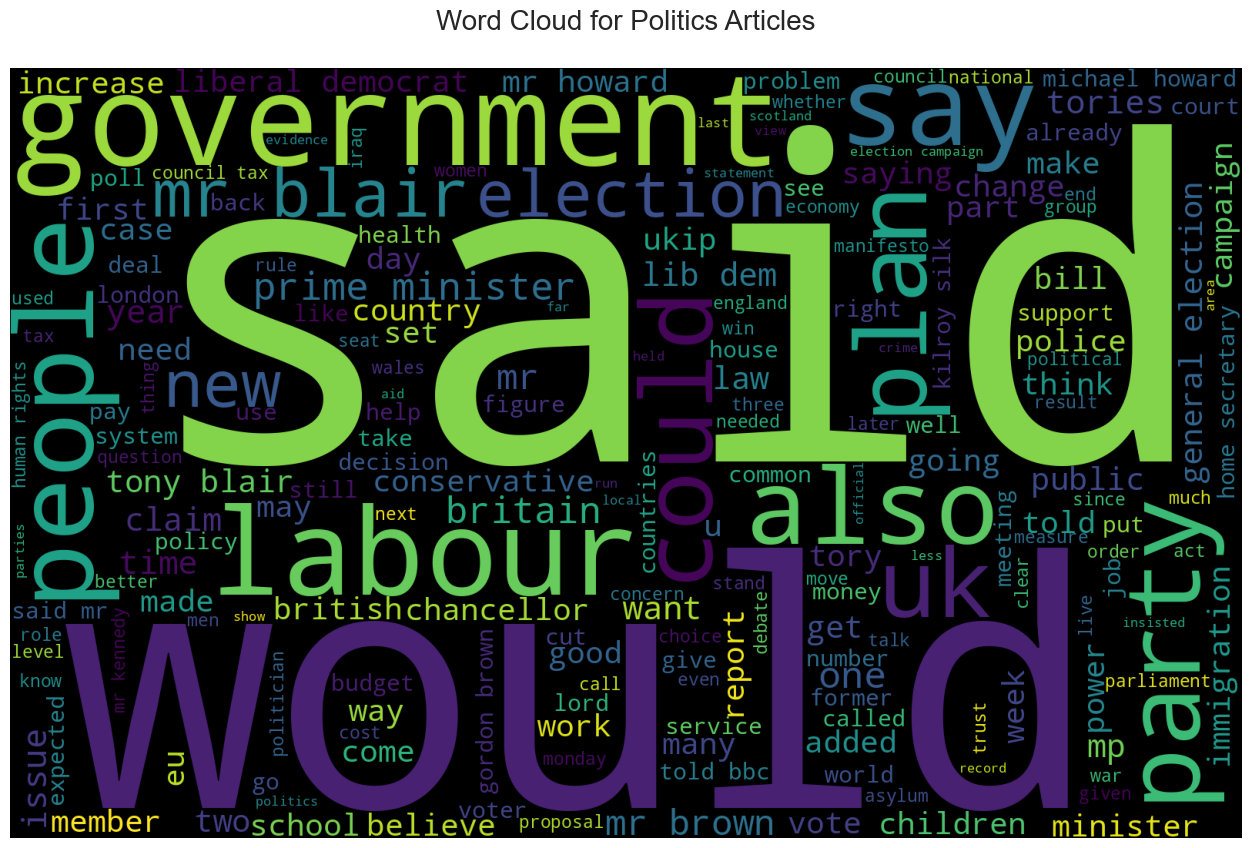

In [34]:
wordcloud(politics, "Politics")

From all of the above word clouds, we make the following observations - 
* The word **"said"** is very frequent in each of the articles In fact it is most frequent in almost every category of article. 
* For **tech** related articles, the words like ***people, technology, computer, software*** are frequent.
* For **business** related articles, the words like ***market, growth, company, firm*** are frequent.
* For **sport** related articles, the words like ***game, match, player, team, win*** are frequent.
* For **entertainment** related articles, the words like ***film, show, music, award, band*** are frequent.
* For **politics** related articles, the words like ***people, plan, labour, government*** are frequent.



One thing that might worry us is that the word **said** is too prevalent in the entire dataset and could lead to some sort of bias. We can be pretty certain that there might not be the case. Why? Because the word is just too prevalent and hence a poor separator of our data. We will verify this in the next step when we will take a look at some of the most relevant words/terms to each of our categories. 

For that purpose, we will adapt a very beautfully written code by Susan Li in [this article](https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f). 

* What we will be doing is using chi-squared test to identify the 2 unigrams and bigrams each that are most relevant to each of the categories. For conducting a chi-squared test, we will need to vectorize our text data first so let's get to it. 

P.S. I have written a more detailed explanation for the above mentioned code for easy understanding below.

## 2.4 Feature Engineering
* When it comes to text data and text analytics in general, feature engineering is converting text data into features which can be used by algorithms i.e. converting text into meaningful numbers. 
* There are many methods to achieve that viz. Tokenization, Vectorization, etc. 
* We will make use of TF-IDF (Term Frequency, Inverse Document Frequency) vectorization to generate features out of our data i.e. the complaints.
* tf-idf vectorization is a technique in which each term in a document and hence the corpus is assigned a weight based on it's frequency. It has two terms.
    1. Term Frequency - This measures the term frequency for each document. 
        > *TF = (number of times term **e** appears in the document) / (total number of words in the document)*
        
    2. Inverse Document Frequency - This measures how important a term is w.r.t. the entire corpus. TF considers all terms equal hence terms which are more frequent like "is", "was", etc. will have a higher TF than more important, but rarer, words like "hazardous", "experiment", etc. IDF scales such rare words up and scales the more frequent words down so as to balance them both.
        > *IDF = ln(number of total documents / number of documents having the term **e**)*
        
    * We then calculate the TF-IDF by simply multiplying both the terms above - 
        > *TF-IDF = TF* x *IDF*

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tf_idf = TfidfVectorizer(
    ngram_range=(1, 2), 
    stop_words=stop_words, 
    max_features=100
)

features = tf_idf.fit_transform(df.Text).toarray()
features.shape

(1490, 100)

* The number of features generated using tf-idf without using the ***max_features*** argument are almost 370,000 which seems like an overkill for such a small dataset. 
* We will instead use the feature available in the tf-idf transformer to select the top *n* number of features instead.
* We will hence select the top 100 features.

In [39]:
features[:5, :5]

array([[0.        , 0.        , 0.14305332, 0.        , 0.08393763],
       [0.        , 0.16609296, 0.34029365, 0.        , 0.        ],
       [0.07223451, 0.        , 0.15734461, 0.        , 0.13848474],
       [0.05111099, 0.        , 0.        , 0.        , 0.06532512],
       [0.        , 0.18550543, 0.        , 0.16717439, 0.        ]])

Now that we have our features, let's use that code by Susan to get our 2 most relevant (correlated) unigrams and bigrams for each category.

In [41]:
from sklearn.feature_selection import chi2
N = 2
labels = df.category_id
for category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tf_idf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(category))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'business':
  . Most correlated unigrams:
. firm
. market
  . Most correlated bigrams:
. 
# 'entertainment':
  . Most correlated unigrams:
. best
. film
  . Most correlated bigrams:
. 
# 'politics':
  . Most correlated unigrams:
. blair
. labour
  . Most correlated bigrams:
. 
# 'sport':
  . Most correlated unigrams:
. game
. win
  . Most correlated bigrams:
. 
# 'tech':
  . Most correlated unigrams:
. mobile
. technology
  . Most correlated bigrams:
. 


> * Going through the features above, we can see that almost all of them make a lot of sense. 
> * Also, no mentions of the word **"said"** as discussed above.

#### What the above code does - 
* Line 4 - Here, a loop is run for each of the category using the dictionary of categories and their corresponding category ids which we created earlier. 
* Line 5 - For each category, a chi-squared test is run to check correlation of each feature against the category in question. Remember that the result is a tuple having two arrays - chi2 values and the respective p-values.
* Line 6 - We get the indices of sorted tuple (sorted in ascending order by chi2 values).
* Line 7 - Get the feature list from tf-idf vector created earlier in order of indices created in line 6.
* Line 8, 9 - separate unigrams and bigrams from the features found
* Line 10, 11, 12 - print the two most important unigrams and bigrams for the category in loop.

# 3. Model Selection

We will use the following algorithms to predict the categories and then compare them to select the most suitable one - 

1. Logistic Regression
2. Naive-Bayes Classifier
3. Random Forest

## 3.1 Train-Test Split

We will use a 70-30 train-test split.

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Text'], df['Category'], train_size = 0.7, random_state = 1)
print("Train Size =", x_train.shape,
      "\nTest Size = ", x_test.shape)

Train Size = (1043,) 
Test Size =  (447,)


## 3.2 Feature Generation

* For the categories, we will make use of label encoder module to convert them into usable feature.
* We will make use of tf-idf vectorization to generate a sparse matrix out of our text data in order for the algorithms to process it.

In [44]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [45]:
# already imported the tf-idf vectorizer
tf_idf.fit(x_train)

x_train = tf_idf.fit_transform(x_train)
x_test = tf_idf.fit_transform(x_test)

print("Train Size =", x_train.shape,
      "\nTest Size = ", x_test.shape)

Train Size = (1043, 100) 
Test Size =  (447, 100)


## 3.3 Applying Algorithms

* Now that we have our data in order, let's start applying some ML algorithms on it and see how they perform. 
* Since we are not dealing with traditional datasets where the features are comprehensible, here we will not concern ourselves with detailed output from the algorithms (p-values, R-squared, etc.) but simply test their performance and test for it's robustness using cross-validation.

### 3.3.1 Summarizing Model Performance

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

naive = MultinomialNB()
logreg = LogisticRegression(random_state = 1)
rf = RandomForestClassifier(n_estimators = 250, random_state = 1)

def model_performance(estimator):
    return cross_val_score(X = x_train, y = y_train, estimator = estimator, cv = 5)
    
cv_result = pd.DataFrame()
cv_result["Model"] = np.repeat(["MultinomialNB", "LogisticRegression", "RandomForestClassifier"], 5)
cv_result["Fold"] = np.tile([1, 2, 3, 4, 5], 3)
cv_result["Accuracy"] = np.concatenate((model_performance(naive), model_performance(logreg), model_performance(rf)))
cv_result

,Model,Fold,Accuracy
0,MultinomialNB,1,0.880383
1,MultinomialNB,2,0.861244
2,MultinomialNB,3,0.880383
3,MultinomialNB,4,0.846154
4,MultinomialNB,5,0.884615
5,LogisticRegression,1,0.880383
6,LogisticRegression,2,0.875598
7,LogisticRegression,3,0.866029
8,LogisticRegression,4,0.855769
9,LogisticRegression,5,0.870192


As can be seen, the accuracy scores have been pretty consistent across all folds for all three of our algorithms. Let's calculate the mean accuracy for each model and chse the best one to make some predictions.

### 3.3.2 Model Selection

In [47]:
cv_result.groupby("Model").Accuracy.mean().sort_values(ascending = False)

Model
RandomForestClassifier    0.883014
MultinomialNB             0.870556
LogisticRegression        0.869594
Name: Accuracy, dtype: float64

As we can see, Random Forest seems to be performing the best out of the three. Logistic Regression and Multinomial Naive-Bayes are almost just as good as Random Forest as they only fall short by 1%. We will now move ahead with Random Forest to make some predictions and see the confusion matrix as well.

### 3.3.3 Predictions

In [48]:
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

pred_df = pd.DataFrame()
pred_df["Actual"] = y_test
pred_df["Predicted"] = predictions
pred_df.head(10)

,Actual,Predicted
0,4,3
1,2,2
2,0,0
3,0,2
4,1,0
5,0,0
6,0,0
7,2,2
8,2,2
9,2,4


### 3.3.4 Confusion Matrix

              precision    recall  f1-score   support

           0       0.54      0.65      0.59        97
           1       0.66      0.48      0.56        81
           2       0.37      0.47      0.41        83
           3       0.64      0.48      0.55       100
           4       0.40      0.43      0.42        86

    accuracy                           0.51       447
   macro avg       0.52      0.50      0.51       447
weighted avg       0.53      0.51      0.51       447



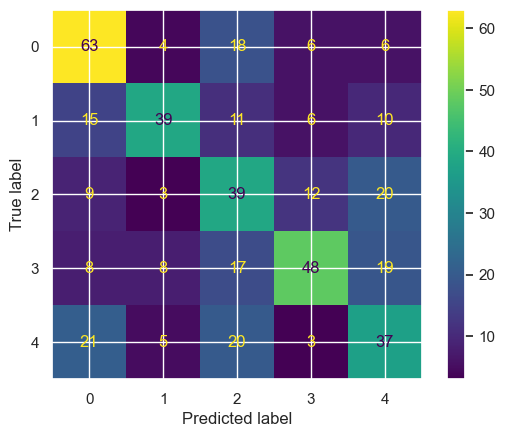

In [51]:
#from pandas_ml import ConfusionMatrix
#cm = ConfusionMatrix(y_test, predictions)
#cm
#cm.print_stats()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Print classification report (similar to cm.print_stats())
print(classification_report(y_test, predictions))

In [53]:
#cm.stats()['overall']
#from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print overall classification statistics
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.54      0.65      0.59        97
           1       0.66      0.48      0.56        81
           2       0.37      0.47      0.41        83
           3       0.64      0.48      0.55       100
           4       0.40      0.43      0.42        86

    accuracy                           0.51       447
   macro avg       0.52      0.50      0.51       447
weighted avg       0.53      0.51      0.51       447



We can now conclude that - 

>***Cross-Validation method used*** >>> **5-Fold Cross Validation**  
>***Training Set Accuracy*** >>> **87 %**  
>***Testing Set Accuracy*** >>> **81 %**

Hence, we can safely accept the Random Forest model as best model for future predictions.

In [55]:
df['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb